In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV (ajusta el nombre si es necesario)
df = pd.read_csv('/content/beneficiarios.csv', sep=';', encoding='utf-8')

# Ver primeras filas
df.head()

# Revisar columnas y tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DEPARTAMENTO          4895 non-null   object
 1   MUNICIPIO             4895 non-null   object
 2   GENERO                4895 non-null   object
 3   EDAD                  4895 non-null   int64 
 4   PLATAFORMA_EDUCATIVA  4895 non-null   object
dtypes: int64(1), object(4)
memory usage: 191.3+ KB


In [ ]:
# 2. Limpieza de columnas clave
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.strip().str.upper()
df['MUNICIPIO'] = df['MUNICIPIO'].str.strip().str.upper()

In [ ]:
# 3. Agrupación por municipio (considerando DEPARTAMENTO + MUNICIPIO)
municipios = df.groupby(['DEPARTAMENTO', 'MUNICIPIO']).size().reset_index(name='BENEFICIARIOS')
municipios = municipios.sort_values(by='BENEFICIARIOS', ascending=False)

In [ ]:
# 4. Mostrar top 10 municipios con más participación
print("📌 Top 10 municipios con más beneficiarios:")
print(municipios.head(10))

📌 Top 10 municipios con más beneficiarios:
        DEPARTAMENTO     MUNICIPIO  BENEFICIARIOS
52            BOGOTA  BOGOTA, D.C.           1904
29         ANTIOQUIA      MEDELLIN            727
203  VALLE DEL CAUCA          CALI            250
45         ATLANTICO  BARRANQUILLA            147
175        SANTANDER   BUCARAMANGA            121
20         ANTIOQUIA      ENVIGADO             85
8          ANTIOQUIA         BELLO             77
75            CALDAS     MANIZALES             74
34         ANTIOQUIA      SABANETA             73
54           BOLIVAR     CARTAGENA             66


In [ ]:
# 5. Mostrar municipios con baja participación (por ejemplo, <= 10)
baja_participacion = municipios[municipios['BENEFICIARIOS'] <= 10]
print(f"\n Municipios con ≤ 10 beneficiarios (baja cobertura): {len(baja_participacion)} encontrados.")
print(baja_participacion)


 Municipios con ≤ 10 beneficiarios (baja cobertura): 178 encontrados.
        DEPARTAMENTO        MUNICIPIO  BENEFICIARIOS
121     CUNDINAMARCA         GIRARDOT             10
63            BOYACA          DUITAMA             10
80           CAQUETA        FLORENCIA              9
28         ANTIOQUIA        MARINILLA              9
174        SANTANDER  BARRANCABERMEJA              9
..               ...              ...            ...
215  VALLE DEL CAUCA             TORO              1
217  VALLE DEL CAUCA            ULLOA              1
220           VAUPES             MITU              1
221          VICHADA     LA PRIMAVERA              1
222          VICHADA   PUERTO CARREÑO              1

[178 rows x 3 columns]


/tmp/ipython-input-3769578304.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top15, x='BENEFICIARIOS', y=top15['MUNICIPIO'] + " (" + top15['DEPARTAMENTO'] + ")", palette='mako')


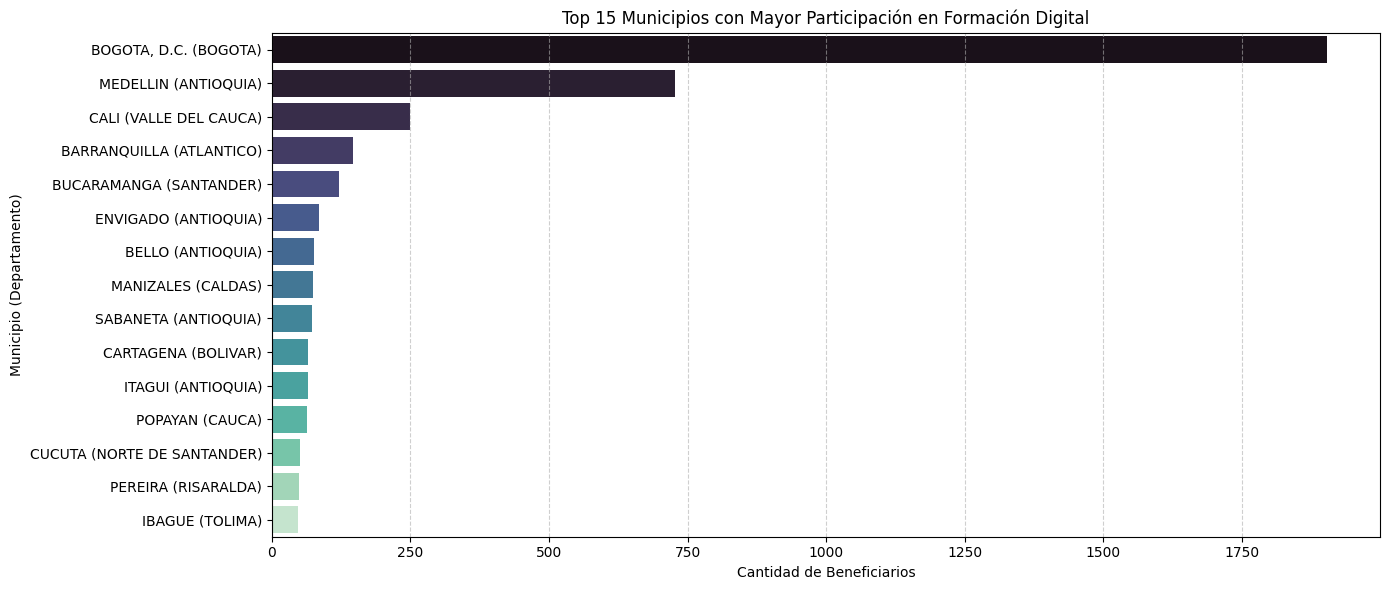

In [ ]:
# 6. Gráfico: Top 15 municipios
plt.figure(figsize=(14, 6))
top15 = municipios.head(15)
sns.barplot(data=top15, x='BENEFICIARIOS', y=top15['MUNICIPIO'] + " (" + top15['DEPARTAMENTO'] + ")", palette='mako')
plt.title('Top 15 Municipios con Mayor Participación en Formación Digital')
plt.xlabel('Cantidad de Beneficiarios')
plt.ylabel('Municipio (Departamento)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



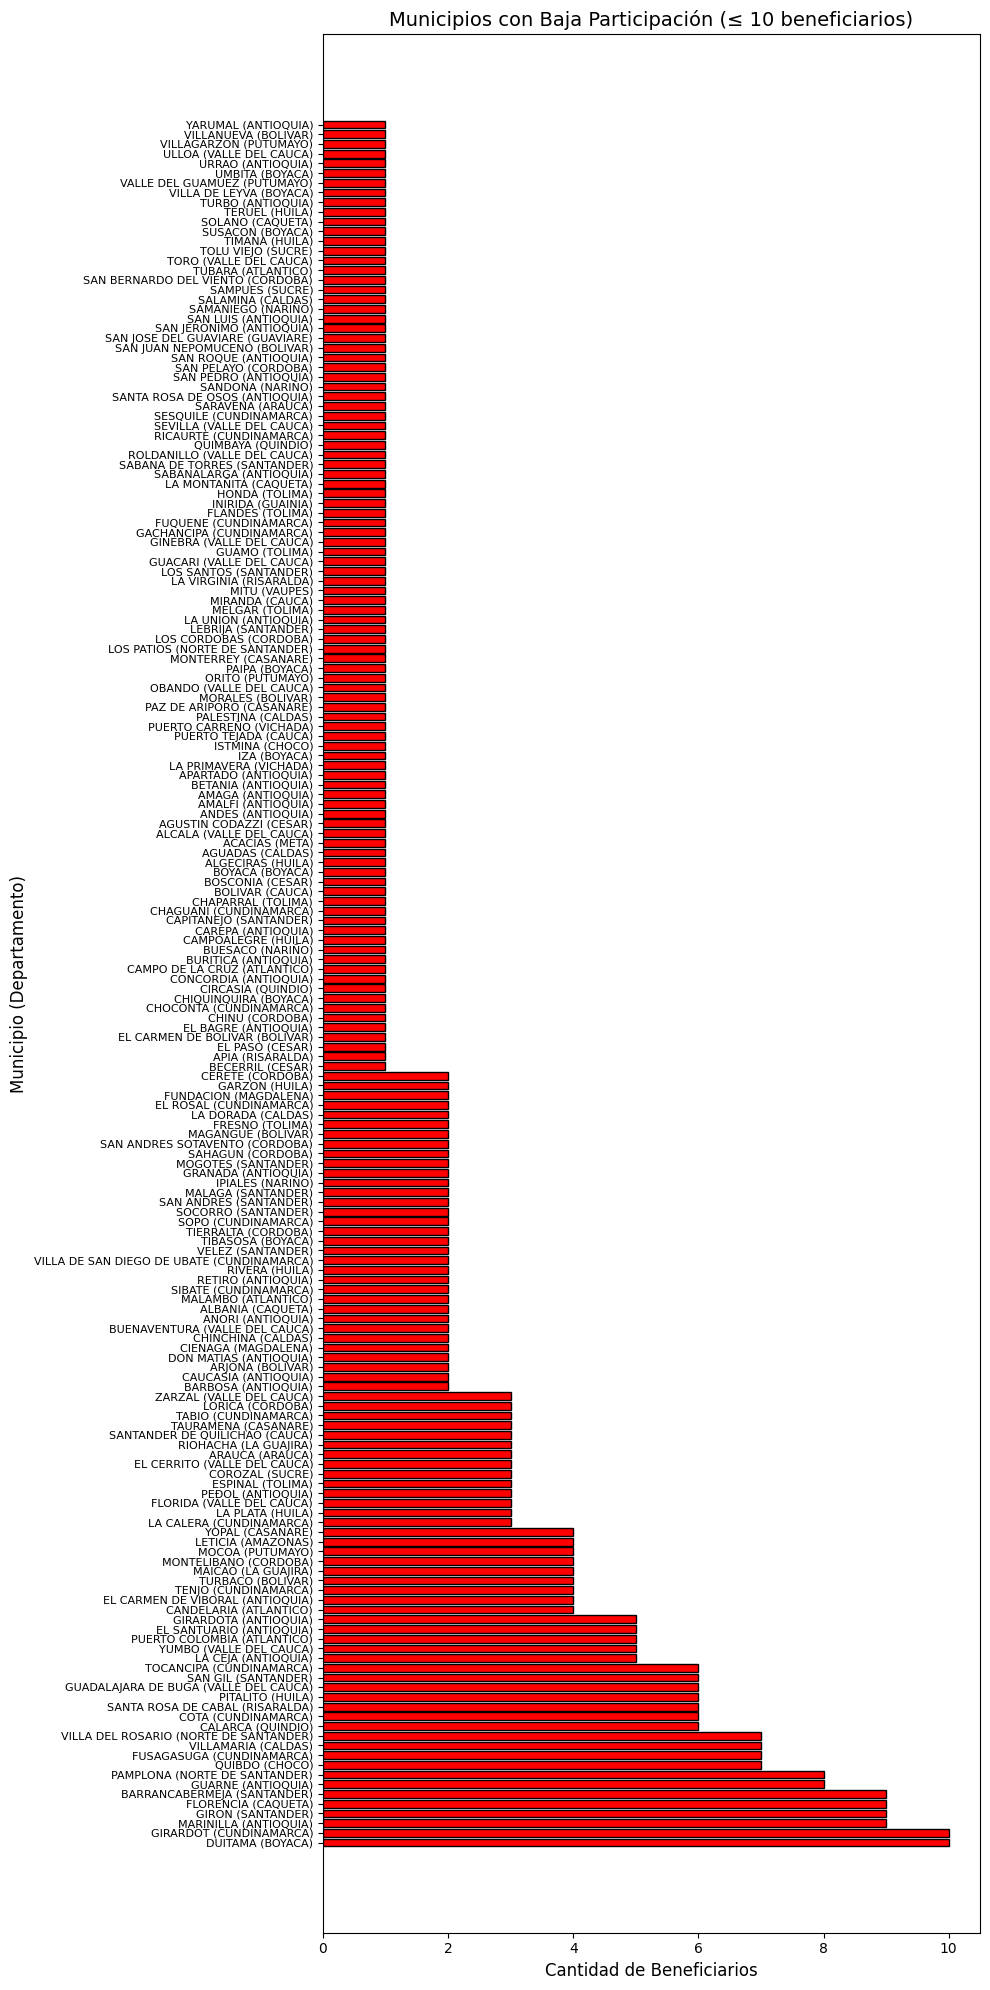

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo (ajusta si ya lo tienes cargado)
df = pd.read_csv('/content/beneficiarios.csv', sep=';')

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.upper()

# Agrupar por municipio y departamento
df_grouped = df.groupby(['MUNICIPIO', 'DEPARTAMENTO']).size().reset_index(name='CANTIDAD_BENEFICIARIOS')

# Concatenar para etiquetas
df_grouped['MUNICIPIO_DEPTO'] = df_grouped['MUNICIPIO'] + ' (' + df_grouped['DEPARTAMENTO'] + ')'

# Filtrar municipios con 10 o menos beneficiarios
df_baja_part = df_grouped[df_grouped['CANTIDAD_BENEFICIARIOS'] <= 10].sort_values('CANTIDAD_BENEFICIARIOS', ascending=False)

# --- Gráfico ---
plt.figure(figsize=(10, 20))

plt.barh(
    df_baja_part['MUNICIPIO_DEPTO'],
    df_baja_part['CANTIDAD_BENEFICIARIOS'],
    color='red',
    edgecolor='black'
)

plt.xlabel('Cantidad de Beneficiarios', fontsize=12)
plt.ylabel('Municipio (Departamento)', fontsize=12)
plt.title('Municipios con Baja Participación (≤ 10 beneficiarios)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()


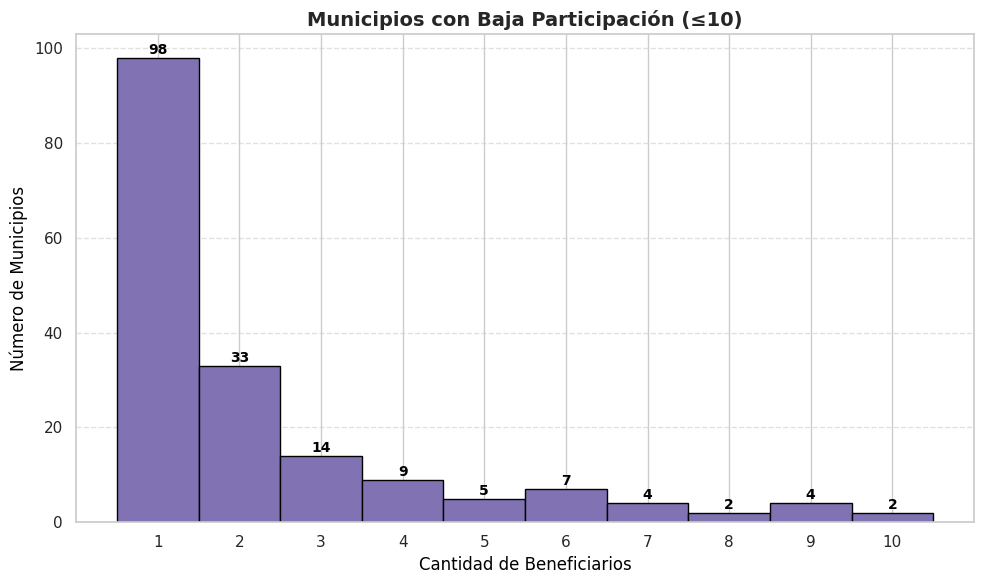

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual moderno
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Paleta de color llamativa
color = sns.color_palette("deep", 9)[4]

# Histograma
counts, bins, patches = plt.hist(
    df_baja_part['CANTIDAD_BENEFICIARIOS'],
    bins=range(1, 12),
    edgecolor='black',
    color=color,
    align='left'
)

# Etiquetas en cada barra
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width()/2,
             count + 0.2,
             int(count),
             ha='center',
             va='bottom',
             fontsize=10,
             fontweight='bold',
             color='black')

# Títulos y etiquetas
plt.xlabel('Cantidad de Beneficiarios', fontsize=12, color='black')
plt.ylabel('Número de Municipios', fontsize=12, color='black')
plt.title('Municipios con Baja Participación (≤10)', fontsize=14, weight='bold')

# Ajustes adicionales
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


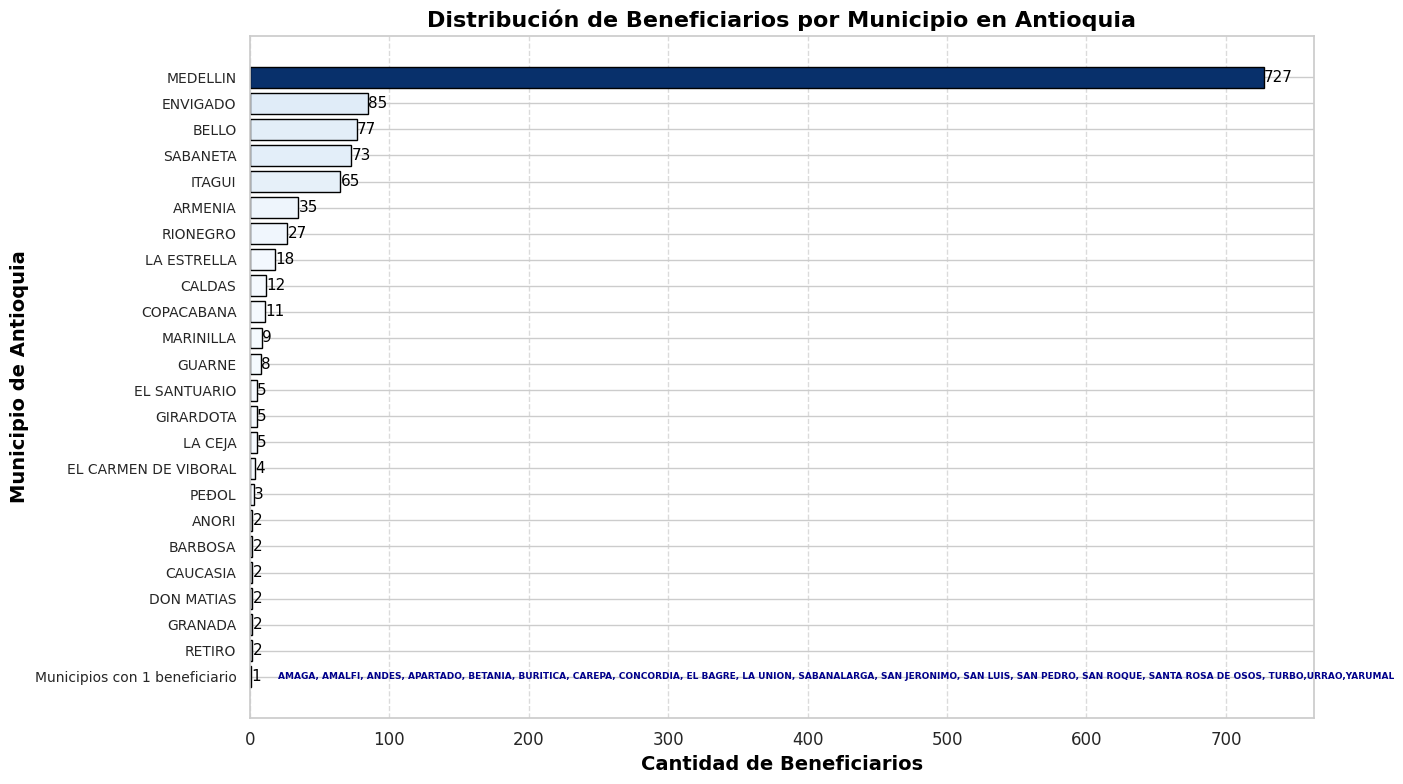

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el archivo
df = pd.read_csv('/content/beneficiarios.csv', sep=';')
df.columns = df.columns.str.strip().str.upper()

# Filtrar Antioquia
df_antioquia = df[df['DEPARTAMENTO'] == 'ANTIOQUIA']
df_grouped = df_antioquia.groupby('MUNICIPIO').size().reset_index(name='CANTIDAD_BENEFICIARIOS')

# Filtrar grupos
grupo_1 = df_grouped[df_grouped['CANTIDAD_BENEFICIARIOS'] == 1]
resto = df_grouped[df_grouped['CANTIDAD_BENEFICIARIOS'] >= 2]

# Ordenar y unir
otros = resto.sort_values(by='CANTIDAD_BENEFICIARIOS', ascending=False)
agrupados = pd.DataFrame({
    'MUNICIPIO': ['Municipios con 1 beneficiario'],
    'CANTIDAD_BENEFICIARIOS': [1]
})

df_final = pd.concat([otros, agrupados], ignore_index=True)
df_final = df_final.sort_values(by='CANTIDAD_BENEFICIARIOS', ascending=False)

# Estilo gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Normalizar para colormap
norm = plt.Normalize(df_final['CANTIDAD_BENEFICIARIOS'].min(), df_final['CANTIDAD_BENEFICIARIOS'].max())
cmap = plt.get_cmap('Blues')
colors = [cmap(norm(value)) for value in df_final['CANTIDAD_BENEFICIARIOS']]

# Gráfico
bars = plt.barh(
    df_final['MUNICIPIO'],
    df_final['CANTIDAD_BENEFICIARIOS'],
    color=colors,
    edgecolor='black',
    height=0.8
)

# Etiquetas
plt.xlabel('Cantidad de Beneficiarios', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Municipio de Antioquia', fontsize=14, fontweight='bold', color='black')
plt.title('Distribución de Beneficiarios por Municipio en Antioquia', fontsize=16, fontweight='bold', color='black')

# Valores en barras
for index, value in enumerate(df_final['CANTIDAD_BENEFICIARIOS']):
    plt.text(value + 0.1, index, str(value), ha='left', va='center', fontsize=11, color='black')

# ➕ Agregar texto frente a la barra "Municipios con 1 beneficiario"
# Obtener índice (posición vertical) de esa fila
index_1_benef = df_final[df_final['MUNICIPIO'] == 'Municipios con 1 beneficiario'].index[0]

# Agregar texto
plt.text(
    x=20,  # un poco más a la derecha del valor 1
    y=index_1_benef,
    s='AMAGA, AMALFI, ANDES, APARTADO, BETANIA, BURITICA, CAREPA, CONCORDIA, EL BAGRE, LA UNION, SABANALARGA, SAN JERONIMO, SAN LUIS, SAN PEDRO, SAN ROQUE, SANTA ROSA DE OSOS, TURBO,URRAO,YARUMAL',
    fontsize=6.5,
    color='darkblue',
    va='center',
    fontweight='bold'
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


